<a href="https://colab.research.google.com/github/Fiona-cherutto/Moringa-School--Projects/blob/master/Moringa_Data_Science_Prep_W4_Independent_Project_2019_06_FIONA_CHERUTTO_Python_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Business Understanding

## Problem statment

As a data scientist analys an electric car-sharing service company and understand electric car usage over time and identify the most popular hour of the day for picking up a shared electric car (Bluecar) in the city of Paris over the month of April 2018.

## Objectives:



*  Find the most popular hour for returning cars
 
*   Which station is the most popular for
    1.   Overall
    2.   At the most popular picking hour

*   Which postal code is the most popular for picking up Blue cars. Does the most popular station belong to that postal code
    1.  Overall
    2.  At the most popular picking hour

*   Does the results change if you consider Utilib and Utilib 1.4 instead of Blue cars





# Importing the Libraries to be used

In [9]:
# Importing the pandas library
# 
import pandas as pd

# Importing the numpy library
#
import pandas as np

# Loading our Datasets

The dataset we will use contains electric car  that has been used over time 

Dataset link for download or access: http://bit.ly/autolib_dataset

In [10]:
# read the data from the CSV file and create the dataframe to be used
# 
df= pd.read_csv('/content/Autolib_dataset (2) (3).csv')

In [11]:
#  read the data from the CSV file and create the dataframe to be used
# 
#import  docx

#doc = docx.Document("E:/content/Autolib_DDI_DB_description_MoringaSchool_w4.docx")


# DATA UNDERSTANDING

## Previewing our Dataset

In [12]:
# Let's preview the first 10 rows of our data
# 
df.head(10)

,Address,Cars,Bluecar counter,Utilib counter,Utilib 1.4 counter,Charge Slots,Charging Status,City,Displayed comment,ID,Kind,Geo point,Postal code,Public name,Rental status,Scheduled at,Slots,Station type,Status,Subscription status,year,month,day,hour,minute
0,2 Avenue de Suffren,0,0,0,0,0,nonexistent,Paris,NaN,paris-suffren-2,STATION,"48.857, 2.2917",75015,Paris/Suffren/2,operational,NaN,2,station,ok,nonexistent,2018,4,8,11,43
1,145 Rue Raymond Losserand,6,6,0,0,0,operational,Paris,NaN,paris-raymondlosserand-145,STATION,"48.83126, 2.313088",75014,Paris/Raymond Losserand/145,operational,NaN,0,station,ok,nonexistent,2018,4,6,7,24
2,2 Avenue John Fitzgerald Kennedy,3,3,0,2,0,operational,Le Bourget,NaN,lebourget-johnfitzgeraldkennedy-2,STATION,"48.938103, 2.4286035",93350,Le Bourget/John Fitzgerald Kennedy/2,operational,NaN,1,station,ok,nonexistent,2018,4,3,20,14
3,51 Rue EugÃ¨ne OudinÃ©,3,3,1,0,1,operational,Paris,NaN,paris-eugeneoudine-51,STATION,"48.8250327, 2.3725162",75013,Paris/EugÃ¨ne OudinÃ©/51,operational,NaN,2,station,ok,nonexistent,2018,4,4,4,37
4,6 avenue de la Porte de Champerret,3,3,0,0,0,nonexistent,Paris,NaN,paris-portedechamperret-6,PARKING,"48.8862632, 2.2874511",75017,Paris/Porte de Champerret/6,operational,NaN,3,station,ok,nonexistent,2018,4,8,17,23
5,8 Boulevard Voltaire,0,0,0,0,0,nonexistent,Paris,NaN,paris-voltaire-8,STATION,"48.8657658, 2.3664376",75011,Paris/Voltaire/8,operational,NaN,4,station,ok,nonexistent,2018,4,6,7,2
6,37 rue Leblanc,0,0,0,0,0,nonexistent,Paris,"Station en parking (niv -1), accÃ¨s 37 rue Leb...",paris-citroencevennes-parking,PARKING,"48.83874, 2.27641",75015,Paris/CitroÃ«n CÃ©vennes/Parking,broken,NaN,0,station,closed,nonexistent,2018,4,8,18,20
7,17 Rue des Luaps ProlongÃ©e,3,3,1,0,0,nonexistent,Nanterre,NaN,nanterre-luaps-17,STATION,"48.88069, 2.21063",92000,Nanterre/Luaps/17,operational,NaN,0,station,ok,nonexistent,2018,4,4,22,13
8,34 avenue Jean Moulin,1,1,0,0,0,nonexistent,Paris,NaN,paris-jeanmoulin-34,STATION,"48.8266807, 2.3237355",75014,Paris/Jean Moulin/34,operational,NaN,4,station,ok,nonexistent,2018,4,2,22,58
9,41 boulevard de Rochechouart,6,6,0,0,0,nonexistent,Paris,NaN,paris-anvers-parking,PARKING,"48.88267, 2.34405",75009,Paris/Anvers/Parking,operational,NaN,0,station,ok,nonexistent,2018,4,4,15,2


## Data  Describing 

### Accessing Information about our Dataset

We might need to convert columns to the respective datatypes ie. if there are payment columns we could convert them from string to float. This observation can be made by accessing information about the dataset.

In [13]:
# Getting to know more about the dataset by accessing its informatio
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Address              5000 non-null   object
 1   Cars                 5000 non-null   int64 
 2   Bluecar counter      5000 non-null   int64 
 3   Utilib counter       5000 non-null   int64 
 4   Utilib 1.4 counter   5000 non-null   int64 
 5   Charge Slots         5000 non-null   int64 
 6   Charging Status      5000 non-null   object
 7   City                 5000 non-null   object
 8   Displayed comment    111 non-null    object
 9   ID                   5000 non-null   object
 10  Kind                 5000 non-null   object
 11  Geo point            5000 non-null   object
 12  Postal code          5000 non-null   int64 
 13  Public name          5000 non-null   object
 14  Rental status        5000 non-null   object
 15  Scheduled at         47 non-null     object
 16  Slots 

## Data Exploring 

In [14]:
# Viewing a column
df['Cars']

# Viewing two Columns

df[['ID', 'Cars']]

# Viewing the first two Rows

df[:2]



,Address,Cars,Bluecar counter,Utilib counter,Utilib 1.4 counter,Charge Slots,Charging Status,City,Displayed comment,ID,Kind,Geo point,Postal code,Public name,Rental status,Scheduled at,Slots,Station type,Status,Subscription status,year,month,day,hour,minute
0,2 Avenue de Suffren,0,0,0,0,0,nonexistent,Paris,NaN,paris-suffren-2,STATION,"48.857, 2.2917",75015,Paris/Suffren/2,operational,NaN,2,station,ok,nonexistent,2018,4,8,11,43
1,145 Rue Raymond Losserand,6,6,0,0,0,operational,Paris,NaN,paris-raymondlosserand-145,STATION,"48.83126, 2.313088",75014,Paris/Raymond Losserand/145,operational,NaN,0,station,ok,nonexistent,2018,4,6,7,24


In [15]:
# Then find the higest value of car
df['Cars'].max()

7

## Verify data quality

### checking for missing data

In [16]:
# We count the number of non - missing values in the df dataframe
#
df.count()

Address                5000
Cars                   5000
Bluecar counter        5000
Utilib counter         5000
Utilib 1.4 counter     5000
Charge Slots           5000
Charging Status        5000
City                   5000
Displayed comment       111
ID                     5000
Kind                   5000
Geo point              5000
Postal code            5000
Public name            5000
Rental status          5000
Scheduled at             47
Slots                  5000
Station type           5000
Status                 5000
Subscription status    5000
year                   5000
month                  5000
day                    5000
hour                   5000
minute                 5000
dtype: int64

In [17]:
# count those missing values in our dataframe
#
import numpy as np
np.count_nonzero(df.isnull())

9842

In [18]:
# count missing  value in column scheduled
np.count_nonzero(df['Scheduled at'].isnull())

4953

###  checking for outliers

In [19]:
#impotrt to cheack for outer
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
% matplotlib inline 

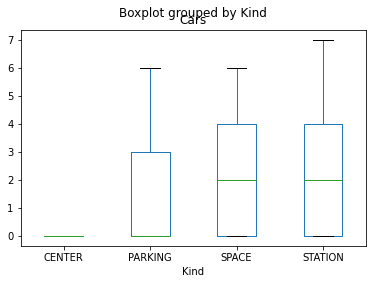

In [20]:
 ## Visualising outliers using box plot.

#  
df.boxplot(column =['Cars'], by ='Kind', grid = False)

## Data quality report
From the analysis above of data verification the date appears to have missing data but with know outliers. Data cleaning is recommended in order to have a clean data to achieve our data mining goals. Otherwise the data is good for our analysis and hereby recommed for continue

# DATA PREPARATION

### Selecting data 

In [21]:
# selecting the data to use
df.drop(['Cars','Charge Slots','Charging Status','Scheduled at','Slots','Subscription status'], axis = 1, inplace = True) 
  
# Display the resulting dataframe
#df

In [22]:
#Select Rows With A Certain Value
df[df['Kind'].map(lambda Kind: 'STATION' in Kind)]

,Address,Bluecar counter,Utilib counter,Utilib 1.4 counter,City,Displayed comment,ID,Kind,Geo point,Postal code,Public name,Rental status,Station type,Status,year,month,day,hour,minute
0,2 Avenue de Suffren,0,0,0,Paris,NaN,paris-suffren-2,STATION,"48.857, 2.2917",75015,Paris/Suffren/2,operational,station,ok,2018,4,8,11,43
1,145 Rue Raymond Losserand,6,0,0,Paris,NaN,paris-raymondlosserand-145,STATION,"48.83126, 2.313088",75014,Paris/Raymond Losserand/145,operational,station,ok,2018,4,6,7,24
2,2 Avenue John Fitzgerald Kennedy,3,0,2,Le Bourget,NaN,lebourget-johnfitzgeraldkennedy-2,STATION,"48.938103, 2.4286035",93350,Le Bourget/John Fitzgerald Kennedy/2,operational,station,ok,2018,4,3,20,14
3,51 Rue EugÃ¨ne OudinÃ©,3,1,0,Paris,NaN,paris-eugeneoudine-51,STATION,"48.8250327, 2.3725162",75013,Paris/EugÃ¨ne OudinÃ©/51,operational,station,ok,2018,4,4,4,37
5,8 Boulevard Voltaire,0,0,0,Paris,NaN,paris-voltaire-8,STATION,"48.8657658, 2.3664376",75011,Paris/Voltaire/8,operational,station,ok,2018,4,6,7,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,8 avenue MÃ©nelotte,2,0,0,Colombes,NaN,colombes-menelotte-8,STATION,"48.9246525, 2.259313",92700,Colombes/MÃ©nelotte/8,operational,station,ok,2018,4,6,11,26
4996,37 rue de Dantzig,4,0,0,Paris,NaN,paris-dantzig-37,STATION,"48.8335103, 2.2987201",75015,Paris/Dantzig/37,operational,station,ok,2018,4,4,16,56
4997,142 rue du Bac,1,0,0,Paris,NaN,paris-bac-142,STATION,"48.8508194, 2.3237968",75007,Paris/Bac/142,operational,station,ok,2018,4,1,7,1
4998,2 avenue du Val de Fontenay,2,0,0,Fontenay-Sous-Bois,NaN,fontenaysousbois-valdefontenay-2,STATION,"48.8528247, 2.4869085",94120,Fontenay-Sous-Bois/Val de Fontenay/2,operational,station,ok,2018,4,4,17,27


In [23]:
#select car not five and greater than 1
df[(df['Bluecar counter'] > 1) & (df['Bluecar counter'] < 5)]

,Address,Bluecar counter,Utilib counter,Utilib 1.4 counter,City,Displayed comment,ID,Kind,Geo point,Postal code,Public name,Rental status,Station type,Status,year,month,day,hour,minute
2,2 Avenue John Fitzgerald Kennedy,3,0,2,Le Bourget,NaN,lebourget-johnfitzgeraldkennedy-2,STATION,"48.938103, 2.4286035",93350,Le Bourget/John Fitzgerald Kennedy/2,operational,station,ok,2018,4,3,20,14
3,51 Rue EugÃ¨ne OudinÃ©,3,1,0,Paris,NaN,paris-eugeneoudine-51,STATION,"48.8250327, 2.3725162",75013,Paris/EugÃ¨ne OudinÃ©/51,operational,station,ok,2018,4,4,4,37
4,6 avenue de la Porte de Champerret,3,0,0,Paris,NaN,paris-portedechamperret-6,PARKING,"48.8862632, 2.2874511",75017,Paris/Porte de Champerret/6,operational,station,ok,2018,4,8,17,23
7,17 Rue des Luaps ProlongÃ©e,3,1,0,Nanterre,NaN,nanterre-luaps-17,STATION,"48.88069, 2.21063",92000,Nanterre/Luaps/17,operational,station,ok,2018,4,4,22,13
19,11 avenue RenÃ© Coty,4,0,2,Paris,NaN,paris-renecoty-11,STATION,"48.8308657, 2.3339608",75014,Paris/RenÃ© Coty/11,operational,station,ok,2018,4,9,21,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4989,3 Rue Mongenot,4,0,0,Saint-MandÃ©,NaN,saintmande-mongenot-3,STATION,"48.8435084, 2.4171838",94160,Saint-MandÃ©/Mongenot/3,operational,station,ok,2018,4,6,7,28
4995,8 avenue MÃ©nelotte,2,0,0,Colombes,NaN,colombes-menelotte-8,STATION,"48.9246525, 2.259313",92700,Colombes/MÃ©nelotte/8,operational,station,ok,2018,4,6,11,26
4996,37 rue de Dantzig,4,0,0,Paris,NaN,paris-dantzig-37,STATION,"48.8335103, 2.2987201",75015,Paris/Dantzig/37,operational,station,ok,2018,4,4,16,56
4998,2 avenue du Val de Fontenay,2,0,0,Fontenay-Sous-Bois,NaN,fontenaysousbois-valdefontenay-2,STATION,"48.8528247, 2.4869085",94120,Fontenay-Sous-Bois/Val de Fontenay/2,operational,station,ok,2018,4,4,17,27


# Cleaning our Dataset
We will perform various data cleaning procedures that is suitable for the various errors we have in our document to hav our clean data

### Validity

In [24]:
# Syntax Errors
# We can also use str.replace() function on the respective column to strip all the spaces 
# 

df['City'] = df['City'].str.replace(" ","")

# Displaying the resulting dataframe
df

,Address,Bluecar counter,Utilib counter,Utilib 1.4 counter,City,Displayed comment,ID,Kind,Geo point,Postal code,Public name,Rental status,Station type,Status,year,month,day,hour,minute
0,2 Avenue de Suffren,0,0,0,Paris,NaN,paris-suffren-2,STATION,"48.857, 2.2917",75015,Paris/Suffren/2,operational,station,ok,2018,4,8,11,43
1,145 Rue Raymond Losserand,6,0,0,Paris,NaN,paris-raymondlosserand-145,STATION,"48.83126, 2.313088",75014,Paris/Raymond Losserand/145,operational,station,ok,2018,4,6,7,24
2,2 Avenue John Fitzgerald Kennedy,3,0,2,LeBourget,NaN,lebourget-johnfitzgeraldkennedy-2,STATION,"48.938103, 2.4286035",93350,Le Bourget/John Fitzgerald Kennedy/2,operational,station,ok,2018,4,3,20,14
3,51 Rue EugÃ¨ne OudinÃ©,3,1,0,Paris,NaN,paris-eugeneoudine-51,STATION,"48.8250327, 2.3725162",75013,Paris/EugÃ¨ne OudinÃ©/51,operational,station,ok,2018,4,4,4,37
4,6 avenue de la Porte de Champerret,3,0,0,Paris,NaN,paris-portedechamperret-6,PARKING,"48.8862632, 2.2874511",75017,Paris/Porte de Champerret/6,operational,station,ok,2018,4,8,17,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,8 avenue MÃ©nelotte,2,0,0,Colombes,NaN,colombes-menelotte-8,STATION,"48.9246525, 2.259313",92700,Colombes/MÃ©nelotte/8,operational,station,ok,2018,4,6,11,26
4996,37 rue de Dantzig,4,0,0,Paris,NaN,paris-dantzig-37,STATION,"48.8335103, 2.2987201",75015,Paris/Dantzig/37,operational,station,ok,2018,4,4,16,56
4997,142 rue du Bac,1,0,0,Paris,NaN,paris-bac-142,STATION,"48.8508194, 2.3237968",75007,Paris/Bac/142,operational,station,ok,2018,4,1,7,1
4998,2 avenue du Val de Fontenay,2,0,0,Fontenay-Sous-Bois,NaN,fontenaysousbois-valdefontenay-2,STATION,"48.8528247, 2.4869085",94120,Fontenay-Sous-Bois/Val de Fontenay/2,operational,station,ok,2018,4,4,17,27


In [25]:
# Map the lowering function to all column names

df.columns = map(str.lower, df.columns)
df

,address,bluecar counter,utilib counter,utilib 1.4 counter,city,displayed comment,id,kind,geo point,postal code,public name,rental status,station type,status,year,month,day,hour,minute
0,2 Avenue de Suffren,0,0,0,Paris,NaN,paris-suffren-2,STATION,"48.857, 2.2917",75015,Paris/Suffren/2,operational,station,ok,2018,4,8,11,43
1,145 Rue Raymond Losserand,6,0,0,Paris,NaN,paris-raymondlosserand-145,STATION,"48.83126, 2.313088",75014,Paris/Raymond Losserand/145,operational,station,ok,2018,4,6,7,24
2,2 Avenue John Fitzgerald Kennedy,3,0,2,LeBourget,NaN,lebourget-johnfitzgeraldkennedy-2,STATION,"48.938103, 2.4286035",93350,Le Bourget/John Fitzgerald Kennedy/2,operational,station,ok,2018,4,3,20,14
3,51 Rue EugÃ¨ne OudinÃ©,3,1,0,Paris,NaN,paris-eugeneoudine-51,STATION,"48.8250327, 2.3725162",75013,Paris/EugÃ¨ne OudinÃ©/51,operational,station,ok,2018,4,4,4,37
4,6 avenue de la Porte de Champerret,3,0,0,Paris,NaN,paris-portedechamperret-6,PARKING,"48.8862632, 2.2874511",75017,Paris/Porte de Champerret/6,operational,station,ok,2018,4,8,17,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,8 avenue MÃ©nelotte,2,0,0,Colombes,NaN,colombes-menelotte-8,STATION,"48.9246525, 2.259313",92700,Colombes/MÃ©nelotte/8,operational,station,ok,2018,4,6,11,26
4996,37 rue de Dantzig,4,0,0,Paris,NaN,paris-dantzig-37,STATION,"48.8335103, 2.2987201",75015,Paris/Dantzig/37,operational,station,ok,2018,4,4,16,56
4997,142 rue du Bac,1,0,0,Paris,NaN,paris-bac-142,STATION,"48.8508194, 2.3237968",75007,Paris/Bac/142,operational,station,ok,2018,4,1,7,1
4998,2 avenue du Val de Fontenay,2,0,0,Fontenay-Sous-Bois,NaN,fontenaysousbois-valdefontenay-2,STATION,"48.8528247, 2.4869085",94120,Fontenay-Sous-Bois/Val de Fontenay/2,operational,station,ok,2018,4,4,17,27


### complitness

In [26]:
# Checking if there is any missing value in dataframe as a whole
df.isnull()

# Checking if there is any missing value across each column
df.isnull().any()

# Checking how many missing values there are across each column
df.isnull().sum()

# Droppping all 
clean_df = df.dropna()
print(clean_df)

# Verifying that you no longer have any null values by running 
print(clean_df.isnull().sum())

# We might also want to get a total count of missing values
print(df.isnull().sum().sum())

                             address  bluecar counter  ...  hour  minute
6                     37 rue Leblanc                0  ...    18      20
18             26 villa Croix-Nivert                5  ...    20      58
68                     6 avenue Foch                0  ...     3      11
80                       4 Rue Lobau                0  ...    14       3
90                       4 Rue Lobau                0  ...     7       9
...                              ...              ...  ...   ...     ...
4844  47 Boulevard Charles de Gaulle                1  ...     1       4
4851        178 avenue de Versailles                6  ...     1      55
4916   120 boulevard du Montparnasse                0  ...    12      33
4931                   6 avenue Foch                0  ...    14      37
4963           10 rue Jacques Mazaud                2  ...    19      43

[111 rows x 19 columns]
address               0
bluecar counter       0
utilib counter        0
utilib 1.4 counter    0
cit

In [27]:
# Dropping all attributes with any NA values
# 
all_cols_any_na = df.dropna(axis=1)
print(all_cols_any_na)

# Dropping all attributes that have all NA values
# Uncomment the 2 lines below

all_cols_all_na = df.dropna(axis=1, how="all")
print(all_cols_all_na)

                                 address  bluecar counter  ...  hour  minute
0                    2 Avenue de Suffren                0  ...    11      43
1              145 Rue Raymond Losserand                6  ...     7      24
2       2 Avenue John Fitzgerald Kennedy                3  ...    20      14
3                 51 Rue EugÃ¨ne OudinÃ©                3  ...     4      37
4     6 avenue de la Porte de Champerret                3  ...    17      23
...                                  ...              ...  ...   ...     ...
4995                 8 avenue MÃ©nelotte                2  ...    11      26
4996                   37 rue de Dantzig                4  ...    16      56
4997                      142 rue du Bac                1  ...     7       1
4998         2 avenue du Val de Fontenay                2  ...    17      27
4999                 5 Rue Henry Brisson                4  ...    10       2

[5000 rows x 18 columns]
                                 address  bluecar 

In [28]:
#Dropping instances/records/rows with NA missing values 
# 

# Dropping all rows with any NA values 
all_rows_any_na = df.dropna()
print(all_rows_any_na)

# Dropping all rows that have all NA values
# Uncomment the 2 lines below after running the previous lines
all_rows_all_na = df.dropna(how="all")
print(all_rows_all_na)


                             address  bluecar counter  ...  hour  minute
6                     37 rue Leblanc                0  ...    18      20
18             26 villa Croix-Nivert                5  ...    20      58
68                     6 avenue Foch                0  ...     3      11
80                       4 Rue Lobau                0  ...    14       3
90                       4 Rue Lobau                0  ...     7       9
...                              ...              ...  ...   ...     ...
4844  47 Boulevard Charles de Gaulle                1  ...     1       4
4851        178 avenue de Versailles                6  ...     1      55
4916   120 boulevard du Montparnasse                0  ...    12      33
4931                   6 avenue Foch                0  ...    14      37
4963           10 rue Jacques Mazaud                2  ...    19      43

[111 rows x 19 columns]
                                 address  bluecar counter  ...  hour  minute
0                    2

In [29]:
#cheak if still having missing value
print(clean_df.isnull().sum())

address               0
bluecar counter       0
utilib counter        0
utilib 1.4 counter    0
city                  0
displayed comment     0
id                    0
kind                  0
geo point             0
postal code           0
public name           0
rental status         0
station type          0
status                0
year                  0
month                 0
day                   0
hour                  0
minute                0
dtype: int64


### Consistency

In [30]:
# Identifying which observations are duplicates
df_non_duplicates = df.drop_duplicates()

# Let's see these non-duplicate files
print(df_non_duplicates)

                                 address  bluecar counter  ...  hour  minute
0                    2 Avenue de Suffren                0  ...    11      43
1              145 Rue Raymond Losserand                6  ...     7      24
2       2 Avenue John Fitzgerald Kennedy                3  ...    20      14
3                 51 Rue EugÃ¨ne OudinÃ©                3  ...     4      37
4     6 avenue de la Porte de Champerret                3  ...    17      23
...                                  ...              ...  ...   ...     ...
4995                 8 avenue MÃ©nelotte                2  ...    11      26
4996                   37 rue de Dantzig                4  ...    16      56
4997                      142 rue du Bac                1  ...     7       1
4998         2 avenue du Val de Fontenay                2  ...    17      27
4999                 5 Rue Henry Brisson                4  ...    10       2

[5000 rows x 19 columns]


### Uniformity

In [31]:
#  Standardization - Fixing messy column names

# we use strip(), lower() and replace() functions
# 
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')
print(df)

                                 address  bluecar_counter  ...  hour  minute
0                    2 Avenue de Suffren                0  ...    11      43
1              145 Rue Raymond Losserand                6  ...     7      24
2       2 Avenue John Fitzgerald Kennedy                3  ...    20      14
3                 51 Rue EugÃ¨ne OudinÃ©                3  ...     4      37
4     6 avenue de la Porte de Champerret                3  ...    17      23
...                                  ...              ...  ...   ...     ...
4995                 8 avenue MÃ©nelotte                2  ...    11      26
4996                   37 rue de Dantzig                4  ...    16      56
4997                      142 rue du Bac                1  ...     7       1
4998         2 avenue du Val de Fontenay                2  ...    17      27
4999                 5 Rue Henry Brisson                4  ...    10       2

[5000 rows x 19 columns]


In [32]:
# Sorting by column  
df.sort_values(by=['geo_point','day']) 


,address,bluecar_counter,utilib_counter,utilib_1.4_counter,city,displayed_comment,id,kind,geo_point,postal_code,public_name,rental_status,station_type,status,year,month,day,hour,minute
614,92 rue Pierre Brossolette,6,1,0,Yerres,NaN,yerres-pierrebrossolette-92,STATION,"48.7006549, 2.4828313",91330,Yerres/Pierre Brossolette/92,operational,station,ok,2018,4,7,5,40
1485,92 rue Pierre Brossolette,5,1,0,Yerres,NaN,yerres-pierrebrossolette-92,STATION,"48.7006549, 2.4828313",91330,Yerres/Pierre Brossolette/92,operational,station,ok,2018,4,7,19,59
1944,92 rue Pierre Brossolette,0,0,0,Yerres,NaN,yerres-pierrebrossolette-92,STATION,"48.7006549, 2.4828313",91330,Yerres/Pierre Brossolette/92,operational,station,ok,2018,4,8,19,34
1975,92 rue Pierre Brossolette,0,0,0,Yerres,NaN,yerres-pierrebrossolette-92,STATION,"48.7006549, 2.4828313",91330,Yerres/Pierre Brossolette/92,operational,station,ok,2018,4,9,14,43
3023,92 rue Pierre Brossolette,0,0,0,Yerres,NaN,yerres-pierrebrossolette-92,STATION,"48.7006549, 2.4828313",91330,Yerres/Pierre Brossolette/92,operational,station,ok,2018,4,9,14,26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1299,19 Rue de l'ArrivÃ©e,1,0,0,Enghien-les-Bains,NaN,enghienlesbains-arrivee-19,STATION,"48.9727125, 2.3067895",95880,Enghien-les-Bains/ArrivÃ©e/19,operational,station,ok,2018,4,3,9,15
1971,19 Rue de l'ArrivÃ©e,5,0,0,Enghien-les-Bains,NaN,enghienlesbains-arrivee-19,STATION,"48.9727125, 2.3067895",95880,Enghien-les-Bains/ArrivÃ©e/19,operational,station,ok,2018,4,4,23,10
4553,19 Rue de l'ArrivÃ©e,0,2,0,Enghien-les-Bains,NaN,enghienlesbains-arrivee-19,STATION,"48.9727125, 2.3067895",95880,Enghien-les-Bains/ArrivÃ©e/19,operational,station,ok,2018,4,4,11,11
825,19 Rue de l'ArrivÃ©e,2,0,0,Enghien-les-Bains,NaN,enghienlesbains-arrivee-19,STATION,"48.9727125, 2.3067895",95880,Enghien-les-Bains/ArrivÃ©e/19,operational,station,ok,2018,4,8,18,10


In [33]:
 #Converting date column from string to datetime
from datetime import datetime

df['date']=pd.to_datetime(df[['year','month','day','hour','minute']])
df['usage'] = df.sort_values(by=['geo_point','date']).groupby('id')['date'].diff()
df.drop(['year','month','day','hour','minute'], axis = 1, inplace = True) 
df1= df.sort_values(by=['geo_point','date']) 

df1


,address,bluecar_counter,utilib_counter,utilib_1.4_counter,city,displayed_comment,id,kind,geo_point,postal_code,public_name,rental_status,station_type,status,date,usage
614,92 rue Pierre Brossolette,6,1,0,Yerres,NaN,yerres-pierrebrossolette-92,STATION,"48.7006549, 2.4828313",91330,Yerres/Pierre Brossolette/92,operational,station,ok,2018-04-07 05:40:00,NaT
1485,92 rue Pierre Brossolette,5,1,0,Yerres,NaN,yerres-pierrebrossolette-92,STATION,"48.7006549, 2.4828313",91330,Yerres/Pierre Brossolette/92,operational,station,ok,2018-04-07 19:59:00,0 days 14:19:00
1944,92 rue Pierre Brossolette,0,0,0,Yerres,NaN,yerres-pierrebrossolette-92,STATION,"48.7006549, 2.4828313",91330,Yerres/Pierre Brossolette/92,operational,station,ok,2018-04-08 19:34:00,0 days 23:35:00
3023,92 rue Pierre Brossolette,0,0,0,Yerres,NaN,yerres-pierrebrossolette-92,STATION,"48.7006549, 2.4828313",91330,Yerres/Pierre Brossolette/92,operational,station,ok,2018-04-09 14:26:00,0 days 18:52:00
1975,92 rue Pierre Brossolette,0,0,0,Yerres,NaN,yerres-pierrebrossolette-92,STATION,"48.7006549, 2.4828313",91330,Yerres/Pierre Brossolette/92,operational,station,ok,2018-04-09 14:43:00,0 days 00:17:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1299,19 Rue de l'ArrivÃ©e,1,0,0,Enghien-les-Bains,NaN,enghienlesbains-arrivee-19,STATION,"48.9727125, 2.3067895",95880,Enghien-les-Bains/ArrivÃ©e/19,operational,station,ok,2018-04-03 09:15:00,0 days 16:56:00
4553,19 Rue de l'ArrivÃ©e,0,2,0,Enghien-les-Bains,NaN,enghienlesbains-arrivee-19,STATION,"48.9727125, 2.3067895",95880,Enghien-les-Bains/ArrivÃ©e/19,operational,station,ok,2018-04-04 11:11:00,1 days 01:56:00
1971,19 Rue de l'ArrivÃ©e,5,0,0,Enghien-les-Bains,NaN,enghienlesbains-arrivee-19,STATION,"48.9727125, 2.3067895",95880,Enghien-les-Bains/ArrivÃ©e/19,operational,station,ok,2018-04-04 23:10:00,0 days 11:59:00
825,19 Rue de l'ArrivÃ©e,2,0,0,Enghien-les-Bains,NaN,enghienlesbains-arrivee-19,STATION,"48.9727125, 2.3067895",95880,Enghien-les-Bains/ArrivÃ©e/19,operational,station,ok,2018-04-08 18:10:00,3 days 19:00:00


### Construct required data
Exporting the Cleaned Dataset

In [35]:
# Let's export our dataframe into a csv file as shown 

#
df1.to_csv('example.csv')
df1

,address,bluecar_counter,utilib_counter,utilib_1.4_counter,city,displayed_comment,id,kind,geo_point,postal_code,public_name,rental_status,station_type,status,date,usage
614,92 rue Pierre Brossolette,6,1,0,Yerres,NaN,yerres-pierrebrossolette-92,STATION,"48.7006549, 2.4828313",91330,Yerres/Pierre Brossolette/92,operational,station,ok,2018-04-07 05:40:00,NaT
1485,92 rue Pierre Brossolette,5,1,0,Yerres,NaN,yerres-pierrebrossolette-92,STATION,"48.7006549, 2.4828313",91330,Yerres/Pierre Brossolette/92,operational,station,ok,2018-04-07 19:59:00,0 days 14:19:00
1944,92 rue Pierre Brossolette,0,0,0,Yerres,NaN,yerres-pierrebrossolette-92,STATION,"48.7006549, 2.4828313",91330,Yerres/Pierre Brossolette/92,operational,station,ok,2018-04-08 19:34:00,0 days 23:35:00
3023,92 rue Pierre Brossolette,0,0,0,Yerres,NaN,yerres-pierrebrossolette-92,STATION,"48.7006549, 2.4828313",91330,Yerres/Pierre Brossolette/92,operational,station,ok,2018-04-09 14:26:00,0 days 18:52:00
1975,92 rue Pierre Brossolette,0,0,0,Yerres,NaN,yerres-pierrebrossolette-92,STATION,"48.7006549, 2.4828313",91330,Yerres/Pierre Brossolette/92,operational,station,ok,2018-04-09 14:43:00,0 days 00:17:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1299,19 Rue de l'ArrivÃ©e,1,0,0,Enghien-les-Bains,NaN,enghienlesbains-arrivee-19,STATION,"48.9727125, 2.3067895",95880,Enghien-les-Bains/ArrivÃ©e/19,operational,station,ok,2018-04-03 09:15:00,0 days 16:56:00
4553,19 Rue de l'ArrivÃ©e,0,2,0,Enghien-les-Bains,NaN,enghienlesbains-arrivee-19,STATION,"48.9727125, 2.3067895",95880,Enghien-les-Bains/ArrivÃ©e/19,operational,station,ok,2018-04-04 11:11:00,1 days 01:56:00
1971,19 Rue de l'ArrivÃ©e,5,0,0,Enghien-les-Bains,NaN,enghienlesbains-arrivee-19,STATION,"48.9727125, 2.3067895",95880,Enghien-les-Bains/ArrivÃ©e/19,operational,station,ok,2018-04-04 23:10:00,0 days 11:59:00
825,19 Rue de l'ArrivÃ©e,2,0,0,Enghien-les-Bains,NaN,enghienlesbains-arrivee-19,STATION,"48.9727125, 2.3067895",95880,Enghien-les-Bains/ArrivÃ©e/19,operational,station,ok,2018-04-08 18:10:00,3 days 19:00:00


### creating pickup dataframe

In [48]:
#Identify the most popular hour of the day for picking up a shared electric car
# (Bluecar) in the city of Paris over the month of April 2018.

dfs = df1.groupby(["geo_point"])
dfv= dfs.apply(lambda x: x.sort_values(['date']))
df5=dfv.reset_index(drop=True)
df5.head()
df5.groupby('geo_point').head(1)

,address,bluecar_counter,utilib_counter,utilib_1.4_counter,city,displayed_comment,id,kind,geo_point,postal_code,public_name,rental_status,station_type,status,date,usage
0,92 rue Pierre Brossolette,6,1,0,Yerres,NaN,yerres-pierrebrossolette-92,STATION,"48.7006549, 2.4828313",91330,Yerres/Pierre Brossolette/92,operational,station,ok,2018-04-07 05:40:00,NaT
5,99 rue Charles-de-Gaulle,0,0,0,Yerres,NaN,yerres-charlesdegaulle-99,STATION,"48.7164252, 2.4860044",91330,Yerres/Charles-de-Gaulle/99,operational,station,ok,2018-04-02 20:19:00,NaT
10,200 rue Raymond PoincarÃ©,2,0,0,Yerres,NaN,yerres-raymondpoincare-200,STATION,"48.72139, 2.499938",91330,Yerres/Raymond PoincarÃ©/200,operational,station,ok,2018-04-02 15:55:00,NaT
11,4 rue Alexis de Tocqueville,6,0,0,Antony,NaN,antony-alexisdetocqueville-4,STATION,"48.7326149, 2.3141819",92160,Antony/Alexis de Tocqueville/4,operational,station,ok,2018-04-01 10:25:00,NaT
19,12 rue Lavoisier,0,0,0,Limeil-BrÃ©vannes,NaN,limeilbrevannes-lavoisier-12,STATION,"48.73963, 2.490184",94450,Limeil-BrÃ©vannes/Lavoisier/12,broken,station,closed,2018-04-02 02:23:00,NaT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4974,1 rue Maryse BastiÃ©,5,0,0,Aulnay-sous-bois,NaN,aulnaysousbois-marysebastie-1,STATION,"48.9592819, 2.4956263",93600,Aulnay-sous-bois/Maryse BastiÃ©/1,operational,station,ok,2018-04-01 10:41:00,NaT
4981,28 Route d'Argenteuil,0,0,0,Epinay-sur-Seine,NaN,epinaysurseine-argenteuil-28,STATION,"48.9597855, 2.29140544",93800,Epinay-sur-Seine/Argenteuil/28,operational,station,ok,2018-04-04 09:37:00,NaT
4982,64 Rue de Fitzelin,1,0,0,Ãpinay-sur-Seine,NaN,epinaysurseine-fitzelin-64,STATION,"48.960565, 2.3068329",93800,Ãpinay-sur-Seine/Fitzelin/64,operational,station,ok,2018-04-01 20:34:00,NaT
4990,2 rue de la Coussaye,2,0,0,Enghien-les-Bains,NaN,enghienlesbains-coussaye-2,STATION,"48.966392, 2.3016471",95880,Enghien-les-Bains/Coussaye/2,operational,station,ok,2018-04-03 11:18:00,NaT


In [49]:
##Identify the most popular hour of the day for picking up a shared electric car
# (Bluecar) in the city of Paris over the month of April 2018.
df_paris=df5[(df5['city']=='Paris') & (df5['bluecar_counter']>0) & (df5['rental_status']=='operational')]
df_paris.head()
df_popular_picking_hour=df_paris.groupby(['date'])['bluecar_counter'].sum()
df_popular_picking_hour.sort_values(ascending=False).head()

date
2018-04-05 07:34:00    12
2018-04-06 15:07:00    12
2018-04-06 05:52:00    11
2018-04-06 22:29:00    11
2018-04-02 10:44:00    10
Name: bluecar_counter, dtype: int64

### creating a return dateframe

In [45]:
#What is the most popular hour for returning cars
dfa = df1.groupby(["geo_point"])
dfb= dfa.apply(lambda x: x.sort_values(['date']))
df6=dfb.reset_index(drop=True)
df6.head()
df6.groupby('geo_point').tail(1)



,address,bluecar_counter,utilib_counter,utilib_1.4_counter,city,displayed_comment,id,kind,geo_point,postal_code,public_name,rental_status,station_type,status,date,usage
4,92 rue Pierre Brossolette,0,0,0,Yerres,NaN,yerres-pierrebrossolette-92,STATION,"48.7006549, 2.4828313",91330,Yerres/Pierre Brossolette/92,operational,station,ok,2018-04-09 14:43:00,0 days 00:17:00
9,99 rue Charles-de-Gaulle,3,0,0,Yerres,NaN,yerres-charlesdegaulle-99,STATION,"48.7164252, 2.4860044",91330,Yerres/Charles-de-Gaulle/99,operational,station,ok,2018-04-08 23:39:00,0 days 23:49:00
10,200 rue Raymond PoincarÃ©,2,0,0,Yerres,NaN,yerres-raymondpoincare-200,STATION,"48.72139, 2.499938",91330,Yerres/Raymond PoincarÃ©/200,operational,station,ok,2018-04-02 15:55:00,NaT
18,4 rue Alexis de Tocqueville,6,0,1,Antony,NaN,antony-alexisdetocqueville-4,STATION,"48.7326149, 2.3141819",92160,Antony/Alexis de Tocqueville/4,operational,station,ok,2018-04-09 12:37:00,0 days 10:10:00
26,12 rue Lavoisier,0,0,0,Limeil-BrÃ©vannes,NaN,limeilbrevannes-lavoisier-12,STATION,"48.73963, 2.490184",94450,Limeil-BrÃ©vannes/Lavoisier/12,broken,station,closed,2018-04-08 20:03:00,0 days 10:57:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4980,1 rue Maryse BastiÃ©,3,0,0,Aulnay-sous-bois,NaN,aulnaysousbois-marysebastie-1,STATION,"48.9592819, 2.4956263",93600,Aulnay-sous-bois/Maryse BastiÃ©/1,operational,station,ok,2018-04-08 15:44:00,0 days 02:24:00
4981,28 Route d'Argenteuil,0,0,0,Epinay-sur-Seine,NaN,epinaysurseine-argenteuil-28,STATION,"48.9597855, 2.29140544",93800,Epinay-sur-Seine/Argenteuil/28,operational,station,ok,2018-04-04 09:37:00,NaT
4989,64 Rue de Fitzelin,1,0,0,Ãpinay-sur-Seine,NaN,epinaysurseine-fitzelin-64,STATION,"48.960565, 2.3068329",93800,Ãpinay-sur-Seine/Fitzelin/64,operational,station,ok,2018-04-09 17:39:00,0 days 08:44:00
4993,2 rue de la Coussaye,6,0,0,Enghien-les-Bains,NaN,enghienlesbains-coussaye-2,STATION,"48.966392, 2.3016471",95880,Enghien-les-Bains/Coussaye/2,operational,station,ok,2018-04-08 16:09:00,2 days 14:14:00


In [50]:
#What is the most popular hour for returning cars
df_popular_returning_hour=df6.groupby(['date'])['id'].count()
df_popular_returning_hour.sort_values(ascending=False).head()

date
2018-04-06 05:52:00    5
2018-04-06 22:29:00    4
2018-04-04 08:31:00    4
2018-04-04 03:32:00    4
2018-04-01 16:02:00    4
Name: id, dtype: int64

In [51]:
#What station is the most popular
#Overall
dfz= df1[['public_name','usage']]

dfz.sort_values(by='usage', ascending=False).head(1)

,public_name,usage
3287,Paris/Reuilly/80,8 days 07:21:00


In [59]:
#What station is the most popular
#At the most popular picking hour
dfy=df5.groupby(['date'])['public_name'].max()
dfy.sort_values(ascending=False).head()

date
2018-04-04 08:13:00        Ãpinay-sur-Seine/Foch/53
2018-04-01 23:43:00        Ãpinay-sur-Seine/Foch/53
2018-04-07 08:34:00    Ãpinay-sur-Seine/Fitzelin/64
2018-04-05 13:17:00    Ãpinay-sur-Seine/Fitzelin/64
2018-04-09 08:55:00    Ãpinay-sur-Seine/Fitzelin/64
Name: public_name, dtype: object

# EVALUATION
### Determine next steps

after the resarch above the number of car sharing should increase sine the car share is not very busy. the best was to increase the number of usage is by markating the company an having anual discounts for better profits. 